In [1]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import numpy as np
import time

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_squared_error
from scipy.spatial.distance import cdist
from numpy.linalg import pinv
from math import sqrt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import GprModel
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import geopy.distance as distance
from sklearn.preprocessing import MinMaxScaler

import Data_utils
import matplotlib.ticker as ticker
from functools import reduce
from collections import Counter
from scipy.optimize import minimize
from scipy.spatial.distance import cdist

import skgstat as skg
from skgstat import Variogram, OrdinaryKriging

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Experiment results for all 6 features (precip is removed)
# with fixed GPR model

In [4]:
plt.rcParams.update({'font.size': 18})

In [5]:
def subsample_data(data, sample_size = 10000):
    indices = np.random.choice(data.shape[0], sample_size, replace=False)
    
    return indices

# Source: From the TSmodel
def preprocess_data(train_x, test_x, train_y, test_y):
    feature_scaler = StandardScaler()
    scaled_train_x = feature_scaler.fit_transform(train_x)
    scaled_test_x = feature_scaler.transform(test_x)

    target_scaler = StandardScaler()  
    scaled_train_y = target_scaler.fit_transform(train_y)
    scaled_test_y = target_scaler.transform(test_y)    
    
    return scaled_train_x, scaled_test_x, scaled_train_y, scaled_test_y, feature_scaler, target_scaler    

In [6]:
# hyperparameters for the expeirment
# This experiment is completed until 10 stations

number_of_neighbour_stations = [1,2,3,4,5,6,7,8,9, 10,11,12]

# Expeirment related parameters
number_of_folds = 10 # have to be 10 fold

# Results containers for GP only, other models are saved
# GPR is a interpolation method, no need to record traning data.
gpr_rbf_test_results = []

# Determine the optimal value for the given hyperparameter
def do_experiment(hyper_parameter_to_test_values):    
    for hyperparameter_value in hyper_parameter_to_test_values:
        
        # Station data is generated already, only need to train the model
        flatten_train_x = pd.read_csv(f"Data/exp/{hyperparameter_value}x.csv", index_col=0).to_numpy()
        # Select the wind speed only
        flatten_train_y = pd.read_csv(f"Data/exp/{hyperparameter_value}y.csv", index_col=0)['0'].to_numpy().reshape(-1, 1)
        
        # Reshape the data per time stamp
        flatten_train_x_reshaped = flatten_train_x.reshape(20,-1, flatten_train_x.shape[-1])
        flatten_train_y_reshaped = flatten_train_y.reshape(20,-1, flatten_train_y.shape[-1])
        
        flatten_test_x = pd.read_csv(f"Data/exp/{hyperparameter_value}x_test.csv", index_col=0).to_numpy()
         # Select the wind speed only
        flatten_test_y = pd.read_csv(f"Data/exp/{hyperparameter_value}y_test.csv", index_col=0)['0'].to_numpy().reshape(-1, 1)
              
        test_results_fold = []
        
        for i in range(0, number_of_folds):            
            print(f"Currently running fold {i} for {hyperparameter_value} stations")
            indices = np.random.choice(flatten_train_x_reshaped.shape[1], 200, replace=False)
            
            #kernel = 1.0 * RBF(1.0)
            gpr_train_x = np.vstack(flatten_train_x_reshaped[:,indices,:])
            gpr_train_y = np.vstack(flatten_train_y_reshaped[:,indices,:].reshape(-1,1))
            
            gpr_model = GprModel.GprModel()
            gpr_model.fit(np.vstack(flatten_train_x_reshaped[:,indices,:]), np.vstack(flatten_train_y_reshaped[:,indices,:].reshape(-1,1)))
            # GP models test
            mean, rmse = gpr_model.predict(flatten_test_x, flatten_test_y)
                
            test_results_fold.append({'gpr_test' : rmse})
            
            print(rmse)
            
        #After all folds are done, update the result containers
        gpr_rbf_test_results.append(test_results_fold)
        

In [7]:
do_experiment(number_of_neighbour_stations)

Currently running fold 0 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 722.7068660453333
722.7068660453333
Currently running fold 1 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 535.8712655906223
535.8712655906223
Currently running fold 2 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 2370.05557540376
2370.05557540376
Currently running fold 3 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 794.2737241825653
794.2737241825653
Currently running fold 4 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 492.64325782794094
492.64325782794094
Currently running fold 5 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 660.7701399288388
660.7701399288388
Currently running fold 6 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 720.2593427680545
720.2593427680545
Currently running fold 7 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 944.62619839984
944.62619839984
Currently running fold 8 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 962.907315117336
962.907315117336
Currently running fold 9 for 1 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 481.1429185945711
481.1429185945711
Currently running fold 0 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 536.7890009686317
536.7890009686317
Currently running fold 1 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 539.774775528829
539.774775528829
Currently running fold 2 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 748.1141180847602
748.1141180847602
Currently running fold 3 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 980.8980581888301
980.8980581888301
Currently running fold 4 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 1386.6487776729193
1386.6487776729193
Currently running fold 5 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 666.8373817574028
666.8373817574028
Currently running fold 6 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 964.1144109522503
964.1144109522503
Currently running fold 7 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 715.2162288316164
715.2162288316164
Currently running fold 8 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 684.7344675974487
684.7344675974487
Currently running fold 9 for 2 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 573.4306270763404
573.4306270763404
Currently running fold 0 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 130.1204282238296
130.1204282238296
Currently running fold 1 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 99.7952394332634
99.7952394332634
Currently running fold 2 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 526.5025532650419
526.5025532650419
Currently running fold 3 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 166.6178813116596
166.6178813116596
Currently running fold 4 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 111.64036361276551
111.64036361276551
Currently running fold 5 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 75.09363797551227
75.09363797551227
Currently running fold 6 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 51.57347217835206
51.57347217835206
Currently running fold 7 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 66.40465487573276
66.40465487573276
Currently running fold 8 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 87.52503888661391
87.52503888661391
Currently running fold 9 for 3 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 89.16271927931729
89.16271927931729
Currently running fold 0 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 11.065336058016491
11.065336058016491
Currently running fold 1 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 15.934278968383461
15.934278968383461
Currently running fold 2 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 13.46585360870584
13.46585360870584
Currently running fold 3 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 12.306239726348245
12.306239726348245
Currently running fold 4 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 12.178710621460898
12.178710621460898
Currently running fold 5 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 10.43887626535966
10.43887626535966
Currently running fold 6 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 11.226177870217963
11.226177870217963
Currently running fold 7 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 19.28312016973535
19.28312016973535
Currently running fold 8 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 13.995331888319638
13.995331888319638
Currently running fold 9 for 4 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[1. 1. 1.]
Root Mean Squared Error: 11.310491159482442
11.310491159482442
Currently running fold 0 for 5 stations
[3.64259477 1.04371183 0.05531677]
Root Mean Squared Error: 8.07021805582777
8.07021805582777
Currently running fold 1 for 5 stations
[3.51407825 1.02287047 0.06015186]
Root Mean Squared Error: 8.098916438213482
8.098916438213482
Currently running fold 2 for 5 stations
[3.59297765 1.02061176 0.04729935]
Root Mean Squared Error: 8.064960799310867
8.064960799310867
Currently running fold 3 for 5 stations
[3.7744044  1.02621037 0.0774278 ]
Root Mean Squared Error: 8.018370052896158
8.018370052896158
Currently running fold 4 for 5 stations
[3.63722319 1.06064048 0.07497106]
Root Mean Squared Error: 8.111970949221652
8.111970949221652
Currently running fold 5 for 5 stations
[3.69893841 1.0181415  0.082775  ]
Root Mean Squared Error: 8.068572105687599
8.068572105687599
Currently running fold 6 for 5 stations
[3.6552485  1.03502611 0.06537725]
Root Mean Squared Error: 8.0358654212

Root Mean Squared Error: 7.542720734355818
7.542720734355818
Currently running fold 0 for 11 stations
[11.51405887  1.00280458  0.14825419]
Root Mean Squared Error: 7.322026850083866
7.322026850083866
Currently running fold 1 for 11 stations
[11.0880707   1.07340562  0.12884474]
Root Mean Squared Error: 7.472989647417453
7.472989647417453
Currently running fold 2 for 11 stations
[10.98820577  1.0273379   0.12625074]
Root Mean Squared Error: 7.537756003542122
7.537756003542122
Currently running fold 3 for 11 stations
[10.93792024  0.98257947  0.16009799]
Root Mean Squared Error: 7.4085707554565134
7.4085707554565134
Currently running fold 4 for 11 stations
[11.15537708  1.06446771  0.13123516]
Root Mean Squared Error: 7.471529011444787
7.471529011444787
Currently running fold 5 for 11 stations
[11.6376452   1.04853159  0.17052312]
Root Mean Squared Error: 7.449693440540948
7.449693440540948
Currently running fold 6 for 11 stations
[10.50815124  1.02911603  0.1314026 ]
Root Mean Squared 

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[9.00470016 0.47900422 0.70099393]
Root Mean Squared Error: 7.527822917504384
7.527822917504384
Currently running fold 8 for 11 stations
[11.42919342  1.02543386  0.15243858]
Root Mean Squared Error: 7.396147675289341
7.396147675289341
Currently running fold 9 for 11 stations
[10.91441051  1.02348689  0.16270233]
Root Mean Squared Error: 7.435976347978786
7.435976347978786
Currently running fold 0 for 12 stations
[12.40229574  1.07115694  0.16047759]
Root Mean Squared Error: 7.385558344080802
7.385558344080802
Currently running fold 1 for 12 stations
[12.72799581  1.06325376  0.16846753]
Root Mean Squared Error: 7.3137745504220915
7.3137745504220915
Currently running fold 2 for 12 stations
[12.49632895  1.08236307  0.15818582]
Root Mean Squared Error: 7.401163734711924
7.401163734711924
Currently running fold 3 for 12 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[9.46296258 0.49029975 0.70789552]
Root Mean Squared Error: 7.541999896891818
7.541999896891818
Currently running fold 4 for 12 stations
[11.80504965  1.01018019  0.14216109]
Root Mean Squared Error: 7.40707185150529
7.40707185150529
Currently running fold 5 for 12 stations
[11.55284313  1.05871704  0.09191546]
Root Mean Squared Error: 7.611590453238164
7.611590453238164
Currently running fold 6 for 12 stations
[11.8743115   1.09992753  0.23760214]
Root Mean Squared Error: 7.469125824885868
7.469125824885868
Currently running fold 7 for 12 stations


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[8.07624975 0.4503868  0.64031436]
Root Mean Squared Error: 7.816337035145654
7.816337035145654
Currently running fold 8 for 12 stations
[12.21365141  1.05326426  0.10948328]
Root Mean Squared Error: 7.465421630133815
7.465421630133815
Currently running fold 9 for 12 stations
[11.67645216  1.05452999  0.14206581]
Root Mean Squared Error: 7.508919815446616
7.508919815446616


In [14]:
# Save the current experiment result and resume when needed
# Modified from source: https://stackoverflow.com/questions/34342155/how-to-pickle-or-store-jupyter-ipython-notebook-session-for-later

#%store gpr_rbf_test_results_min_feature

#closing seesion, restarting kernel

#%store -r test_results_li_ts_km_nn_min_feature
#%store -r gpr_martern_test_results_min_feature


In [9]:
gpr_rbf_test_results_min_feature = gpr_rbf_test_results

In [11]:
for exp in gpr_rbf_test_results_min_feature:
     print(f"{np.mean([d['gpr_test'] for d in exp if 'gpr_test' in d])}±{np.std([d['gpr_test'] for d in exp if 'gpr_test' in d])}")

868.5256603858861±525.6638581764721
779.6557846659031±250.77984396085893
140.44359890420884±132.43695757057267
13.120441633602999±2.58087619611388
8.059390926246403±0.035076354556313326
7.88074242396209±0.06646243572538571
7.750894401089303±0.05694670476948272
7.672073403346256±0.10030336245738937
7.591353614006806±0.030070319222067945
7.4936910729772706±0.05461071280628836
7.454856091371504±0.0644107182353365
7.492096313646205±0.13493344955040912


In [26]:
# gpr_test_results=[]
# gpr_test_results.append({'gpr_test': 124.28245462517742})
# gpr_test_results.append({'gpr_test': 8.098453253845573})
# gpr_test_results.append({'gpr_test': 7.383525517000387})
# gpr_test_results.append({'gpr_test': 7.266723098591452})
# gpr_test_results.append({'gpr_test': 7.269252212307546})
# gpr_test_results.append({'gpr_test': 7.246991937014375})
# gpr_test_results.append({'gpr_test': 7.127975366729728})
# gpr_test_results.append({'gpr_test': 7.125519317911804})
# gpr_test_results.append({'gpr_test': 7.096831995981307})
# gpr_test_results.append({'gpr_test': 7.09245097390881})
# gpr_test_results.append({'gpr_test': 7.123352723065476})
# gpr_test_results.append({'gpr_test': 7.136209476848252})

Text(0, 0.5, 'RMSE wind speed')

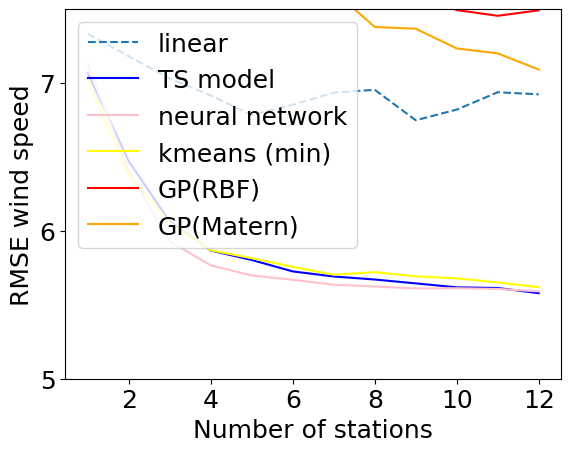

In [15]:
kmeans_train_plot = []
li_train_plot = []
fcm_train_plot = []
nn_train_plot = []
gpr_test_plot = []
gpr_matern_test_plot = []

x_axis =  [1,2,3,4,5,6,7,8,9, 10,11,12]
for exp in test_results_li_ts_km_nn_min_feature:
     kmeans_train_plot.append(np.min([d['kmeans_test'] for d in exp if 'kmeans_test' in d]))
     li_train_plot.append(np.mean([d['linear_test'] for d in exp if 'linear_test' in d]))
     nn_train_plot.append(np.mean([d['nn_test'] for d in exp if 'nn_test' in d]))
     fcm_train_plot.append(np.mean([d['fcm_test'] for d in exp if 'fcm_test' in d]))

for exp in gpr_rbf_test_results_min_feature:
    gpr_test_plot.append(np.mean([d['gpr_test'] for d in exp if 'gpr_test' in d]))
    
for exp in gpr_martern_test_results_min_feature:
    gpr_matern_test_plot.append(np.mean([d['gpr_test'] for d in exp if 'gpr_test' in d]))
   

fig, ax = plt.subplots()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
    
plt.plot(x_axis, li_train_plot, '--', label='linear')
plt.plot(x_axis, fcm_train_plot, label='TS model', c='blue')
plt.plot(x_axis, nn_train_plot, label='neural network', c='pink')
plt.plot(x_axis, kmeans_train_plot, label='kmeans (min)', c='yellow')
plt.plot(x_axis, gpr_test_plot, label='GP(RBF)', c='red')
plt.plot(x_axis, gpr_matern_test_plot, label='GP(Matern)', c='orange')
plt.legend(loc="upper left")
plt.ylim(5,7.5)
plt.xlabel('Number of stations')
plt.ylabel('RMSE wind speed')
